KeyError: 'Flow Calib'

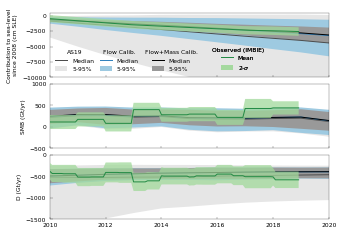

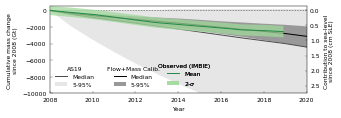

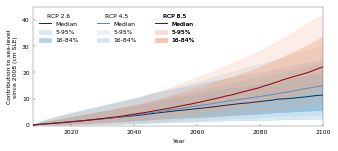

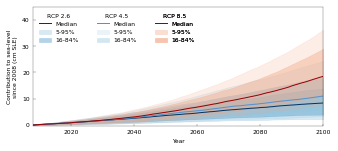

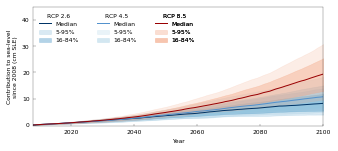

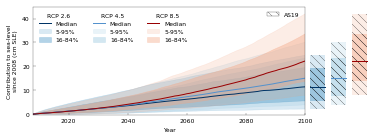

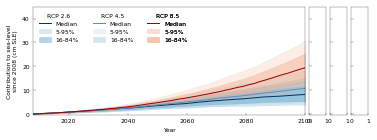

In [7]:
run calibrate-as19.py

In [2]:
        hatch_pattern_dict = {"Flow+Mass Calib.": "", "Flow Calib.": "......", "AS19": "\\\\\\"}


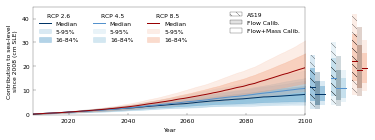

In [8]:
    plot_projection(
        "projection_calibrated_bars.pdf",
        simulated=all_df,
        quantiles=[0.05, 0.16, 0.84, 0.95],
        bars=["AS19", "Flow Calib.", "Flow+Mass Calib."],
    )


['\\\\\\']